## PART A - LINEAR REGRESSION 

In [1]:
# Step 1: Data Pre-processing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
data_set = pd.read_csv('Salary_Data.csv') 
x = data_set.iloc[:, :-1].values # select all columns except the last
y = data_set.iloc[:, 1].values

## x = data_set.iloc[:, :-1].values --> select all columns except the last
## y = data_set.iloc[:, 1].values ----> select only 1 col (generally last one)

In [2]:
data_set.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
x #2d

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [4]:
y #1d

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [ ]:
'''
plot is for drawing line
scatter for points

draw line (PLOT) --> using "predicted"
'''

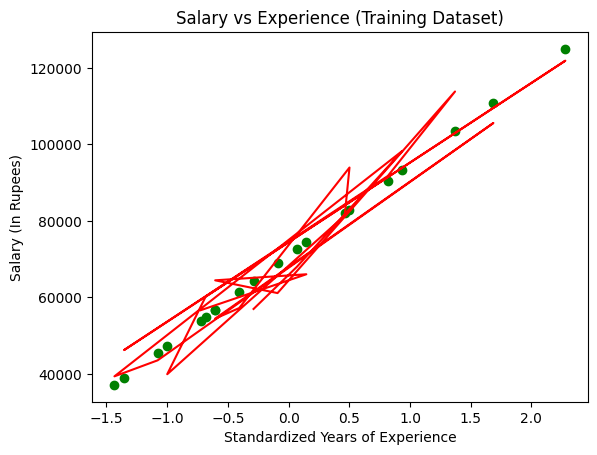

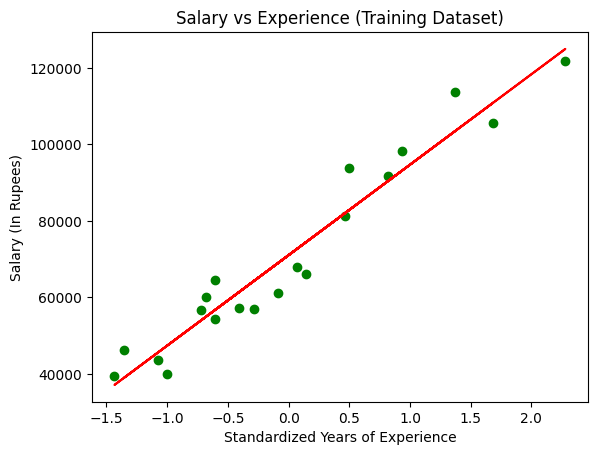

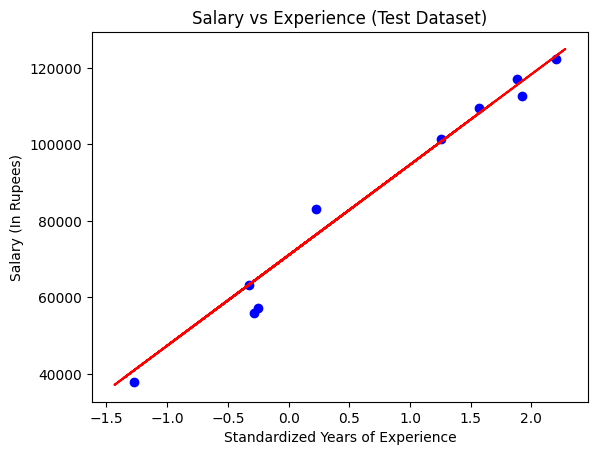

In [14]:
# Step 1: Data Pre-processing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
data_set = pd.read_csv('Salary_Data.csv') 
x = data_set.iloc[:, :-1].values
y = data_set.iloc[:, 1].values

# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model  import LinearRegression

# Assume x and y are defined and represent features and target variable

# Split the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)

# Feature Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled  = scaler.transform(x_test)

# Step 2: Fitting the Simple Linear Regression to the Training Set
regressor = LinearRegression()
regressor.fit(x_train_scaled, y_train)

# Step 3: Prediction of test set result
y_pred_test  = regressor.predict(x_test_scaled)
y_pred_train = regressor.predict(x_train_scaled)

# Step 4: Visualizing the Training set results
plt.scatter(x_train_scaled, y_pred_train,      color="green")
plt.plot   (x_train_scaled, y_train, color="red")
plt.title("Salary vs Experience (Training Dataset)")
plt.xlabel("Standardized Years of Experience")
plt.ylabel("Salary (In Rupees)")
plt.show()

# Step 4: Visualizing the Training set results
plt.scatter(x_train_scaled, y_train,      color="green")
plt.plot   (x_train_scaled, y_pred_train, color="red")
plt.title("Salary vs Experience (Training Dataset)")
plt.xlabel("Standardized Years of Experience")
plt.ylabel("Salary (In Rupees)")
plt.show()

# Step 5: Visualizing the Test set results
plt.scatter(x_test_scaled,  y_test,       color="blue")
plt.plot(   x_train_scaled, y_pred_train, color="red")  # Note: Use x_train_scaled for plotting
plt.title("Salary vs Experience (Test Dataset)")
plt.xlabel("Standardized Years of Experience")
plt.ylabel("Salary (In Rupees)")
plt.show()


# PART B - LOGESTIC REGRESSION

## # Step 2: Fitting Logistic Regression to the Training set
## from sklearn.linear_model import LogisticRegression
## classifier = LogisticRegression(random_state=0)
## classifier.fit(x_train, y_train)

In [6]:
# Step 1: Data Pre-processing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap


# Importing datasets
data_set = pd.read_csv('user_data.csv')
# Extracting Independent and dependent Variable
x = data_set.iloc[:, [2, 3]].values
y = data_set.iloc[:, 4].values

# Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
st_x    = StandardScaler()
x_train = st_x.fit_transform(x_train)
x_test  = st_x.transform(x_test)

# Step 2: Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

# Step 3: Predicting the Test Result
y_pred = classifier.predict(x_test)

# Step 4: Test Accuracy of the result
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


In [11]:
cm

array([[65,  3],
       [ 8, 24]])

In [7]:
def plot_decision_boundary(X_set, Y_set, title, x_label, y_label, legend_labels, classifier):
    # 1. area, step size of the points
    X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                         np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

    # 2. area, color, transparence of background color
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.75, cmap=ListedColormap(['red', 'green']))

    # 3. scaling how large we want the axis
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    # 4. plotting points
    for i, label in enumerate(np.unique(Y_set)):
        plt.scatter(X_set[Y_set == label, 0], X_set[Y_set == label, 1],
                    c=ListedColormap(['red', 'green'])(i), label=str(label))

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(legend_labels) # ARRAY ['0', '1']
    plt.show()

/var/folders/1b/r7bj9kwn3wbf8n_h5chpmjjr0000gn/T/ipykernel_15914/2219478324.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[Y_set == label, 0], X_set[Y_set == label, 1],


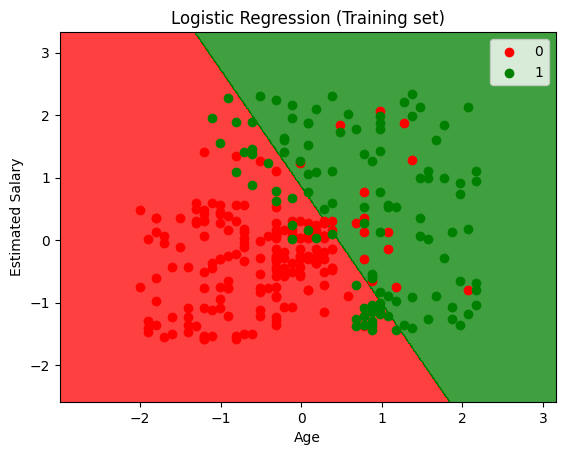

/var/folders/1b/r7bj9kwn3wbf8n_h5chpmjjr0000gn/T/ipykernel_15914/2219478324.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[Y_set == label, 0], X_set[Y_set == label, 1],


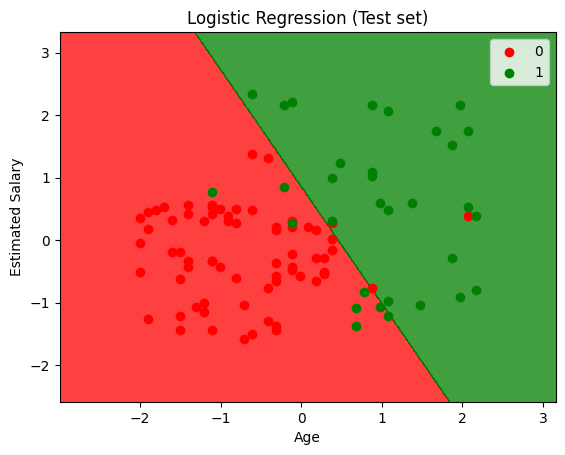

In [8]:

# Plotting the decision boundary
plot_decision_boundary(x_train, y_train, 'Logistic Regression (Training set)', 'Age', 'Estimated Salary', ['0', '1'], classifier)

# Plotting the test set result
plot_decision_boundary(x_test, y_test, 'Logistic Regression (Test set)', 'Age', 'Estimated Salary', ['0', '1'], classifier)